In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Task 1
a)

In [9]:
n = 500
samples = np.zeros(n)
for i in range(n):
    if np.random.rand() < 0.3:
        samples[i] = np.random.normal(1,1)
    else:
        samples[i] = np.random.normal(5,np.sqrt(2))

In [10]:
def theoretical_pdf(x):
    return 0.3 * norm.pdf(x,1,1) + 0.7 * norm.pdf(x,5,np.sqrt(2))    

In [13]:
x = np.linspace(-4,10,1000)

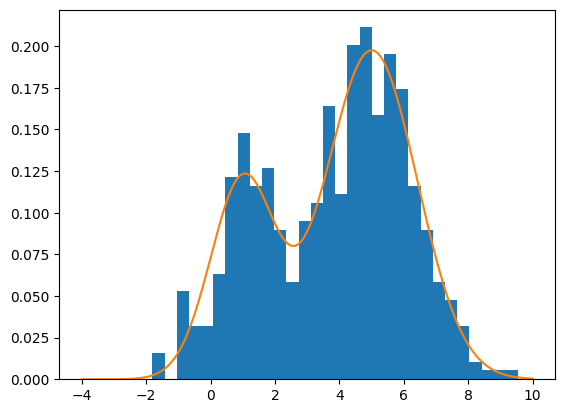

In [14]:
plt.hist(samples, bins=30,density=True)
plt.plot(x, theoretical_pdf(x))
plt.show()

b)

In [44]:
def loglikelihood(x, g,mu0, sigma0, mu1, sigma1, pi0, pi1):
    return np.sum((1-g) *(np.log(norm.pdf(x,mu0,np.sqrt(sigma0)))+ np.log(pi0)) + g * (np.log(norm.pdf(x,mu1,np.sqrt(sigma1)))+ np.log(pi1)))

c)

In [36]:
def get_gamma(x,mu0, sigma0, mu1, sigma1, pi0, pi1):
    return pi1 * norm.pdf(x,mu1,np.sqrt(sigma1)) / (pi0 * norm.pdf(x,mu0,np.sqrt(sigma0)) + pi1 * norm.pdf(x,mu1,np.sqrt(sigma1)))

d)

In [37]:
def get_miu0(x,g):
    return np.sum((1-g) * x) / np.sum(1-g)
def get_miu1(x,g):
    return np.sum(g * x) / np.sum(g)
def get_sigma0(x,g,mu0):
    return np.sum((1-g)*(x-mu0)**2) / np.sum(1-g)
def get_sigma1(x,g,mu1):
    return np.sum(g*(x-mu1)**2) / np.sum(g)
def get_pi0(g):
    return np.sum(1-g) / len(g)
def get_pi1(g):
    return np.sum(g) / len(g)


In [53]:
max_iter = 1000
mu0 = samples[0]
mu1 = samples[1]
sigma0 = np.var(samples)
sigma1 = np.var(samples)
pi0 = 0.5
pi1 = 0.5
loglike_old = loglikelihood(samples,get_gamma(samples,mu0,sigma0,mu1,sigma1,pi0,pi1),mu0,sigma0,mu1,sigma1,pi0,pi1)
for i in range(max_iter):
    g = get_gamma(samples,mu0,sigma0,mu1,sigma1,pi0,pi1)
    mu0_new = get_miu0(samples,g)
    mu1_new = get_miu1(samples,g)
    sigma0 = get_sigma0(samples,g,mu0)
    sigma1 = get_sigma1(samples,g,mu1)
    pi1 = get_pi1(g)
    pi0 = get_pi0(g)
    mu0,mu1 = mu0_new,mu1_new
    loglike = loglikelihood(samples,g,mu0,sigma0,mu1,sigma1,pi0,pi1)
    if np.abs(loglike - loglike_old) < 1e-6:
        print("Converged at iteration", i)
        break
    loglike_old = loglike

Converged at iteration 177


In [56]:
print(mu0,sigma0,pi0,mu1,sigma1,pi1)

1.0729479653656635 1.1479195015966974 0.3124691717943908 5.02785230275624 1.970337547396766 0.6875308282056092


f)

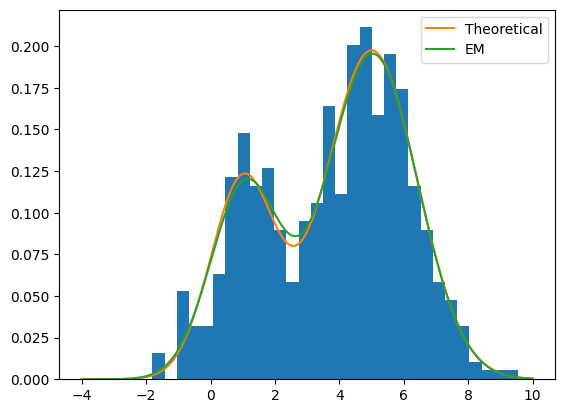

In [55]:
plt.hist(samples, bins=30,density=True)
plt.plot(x, theoretical_pdf(x),label='Theoretical')
plt.plot(x, pi0 * norm.pdf(x,mu0,np.sqrt(sigma0)) + pi1 * norm.pdf(x,mu1,np.sqrt(sigma1)), label='EM')
plt.legend()
plt.show()